# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [537]:
#%%bash
#gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Начнем с необходимых приготовлений.

In [538]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [539]:
coins = pd.read_csv('coins.csv').set_index('date')

Посмотрим что получилось

In [540]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [541]:
count = coins['symbol'].value_counts().shape[0]

In [542]:
count

66

### 2. За какой период данные мы имеем? (0.4 балла)

In [543]:
coins.index.min(), coins.index.max()

('2013-04-28', '2018-06-06')

### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [544]:
coins.isnull().sum()

price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

In [545]:
f'Общее число пропусков: {coins.isnull().sum().sum()}'

'Общее число пропусков: 5197'

**Выведем часть строк, которые содержат пропуски**

In [546]:
coins[coins.isna().any(axis=1)].head()

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2014-08-05,0.002976,NaN,NaN,NaN,XLM,Stellar,0.002976,0.003387,0.002349,0.002440,30316.0,772597.0
2014-08-06,0.002373,NaN,NaN,NaN,XLM,Stellar,0.002373,0.003402,0.002266,0.002657,35820.0,746554.0
2014-08-07,0.002686,NaN,NaN,NaN,XLM,Stellar,0.002686,0.003042,0.002455,0.002501,142864.0,976942.0
2014-08-08,0.002493,NaN,NaN,NaN,XLM,Stellar,0.002493,0.003243,0.002493,0.002881,93708.0,1075820.0
2014-08-09,0.002884,NaN,NaN,NaN,XLM,Stellar,0.002884,0.003710,0.002873,0.003481,233579.0,1261300.0


Как мы видим общее число пропусков - 5197.

Можем заметить, что пропуски сконцентрированы в определенных столбцах, а не разбросаны по строке. Значит значения, которые указана в этих столбцах либо не несут большой информации, либо эти столбцы не сильно информативны, как остальные и аналитику можно провести без знания этих данных.

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [548]:
coins[['symbol', 'price']].loc[coins['price'].idxmax()].sort_values('price', ascending=False).head(1)

,symbol,price
date,,
2017-12-17,BTC,19475.8


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

In [549]:
coins_describe = coins[['symbol', 'market']].groupby(by='symbol').mean().sort_values('market', ascending=False)

**Самая низкая средняя капитализация**

In [550]:
coins_describe['market'].iloc[-1]

28203506.20262664

**Самая высокая средняя капитализация**

In [551]:
coins_describe['market'].iloc[0]

30782136351.01822

**Разделим данные на топ-4 и другие**

(так как валюты с низким процентом ухудшат информативность диаграммы)

In [552]:
best_coins = coins_describe.head(5)
another_coins = coins_describe.drop(np.array(best_coins.index))
another_coins = another_coins['market'].sum()

In [553]:
best_coins.reset_index(inplace=True)
best_coins.loc[len(best_coins.index)] = ['Другие', another_coins]
best_coins = best_coins.set_index('symbol')

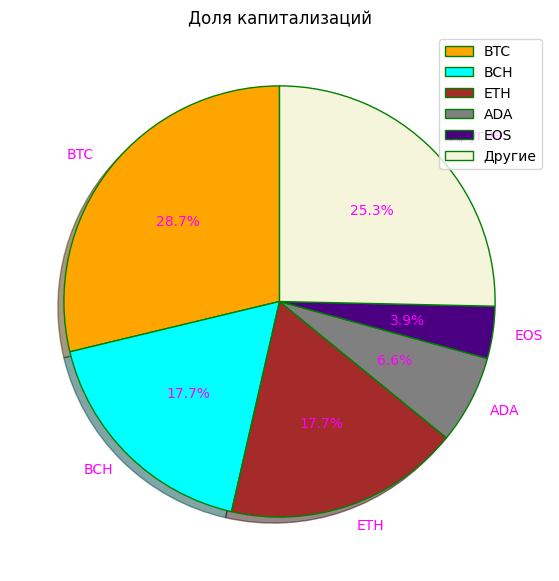

In [554]:
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")

wp = { 'linewidth' : 1, 'edgecolor' : "green" }

fig, ax = plt.subplots(figsize =(10, 7))

ax.pie(best_coins['market'], labels = best_coins.index, shadow = True, startangle = 90,
       colors=colors, wedgeprops = wp, textprops = dict(color ="magenta"), autopct='%1.1f%%')

ax.legend(best_coins.index)
ax.set_title('Доля капитализаций')

plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [555]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as dates

In [556]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
   
    # Фильтрация данных
    df_coins = coins[coins.symbol == symbol]
    df_coins = df_coins[['open', 'high', 'low', 'close']].reset_index()
    df_coins = df_coins[df_coins.date >= start_date]
    df_coins = df_coins[df_coins.date <= end_date]
    
    # Преобразуем данные
    df_coins['date'] = pd.to_datetime(df_coins['date'])
    df_coins['date'] = df_coins['date'].apply(dates.date2num)
    df_coins = df_coins.astype(float)
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    candlestick_ohlc(ax, df_coins.values, width=0.55, alpha=0.8, colorup='red', colordown='green')
    
    ax.grid(color='grey', linestyle='-', linewidth=2)
    
    ax.set_xlabel('Дата')
    ax.set_ylabel('Цена монеты')
    ax.set_title(f'Аналитика {symbol} c {start_date} по {end_date}')
    ax.xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
    plt.xticks(rotation=45)
    
    plt.show()

Посмотрим, что получилось:

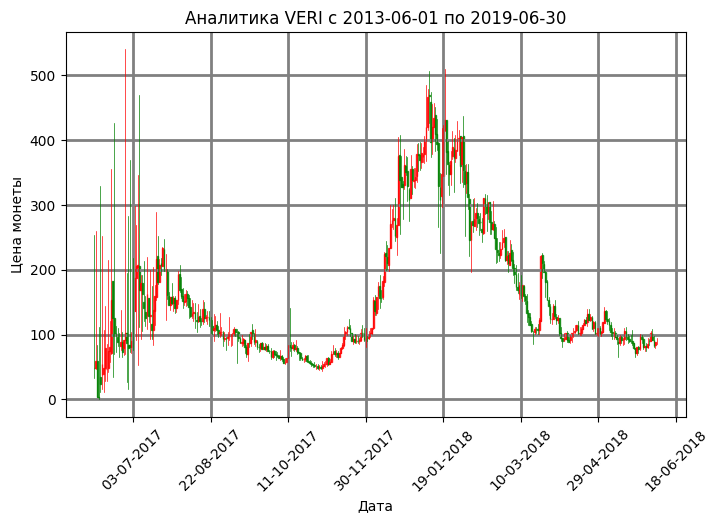

In [557]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [558]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    
    # Фильтрация
    df_coins = coins[coins['symbol'] == symbol]
    df_coins = df_coins.reset_index()
    df_coins = df_coins[df_coins.date >= start_date]
    df_coins = df_coins[df_coins.date <= end_date]
    
    df_coins['pnd'] = df_coins.apply(lambda row: row.high / max(row.open, row.close), axis=1)
    max_pnd = np.max(df_coins['pnd'])
    df_coins = df_coins[df_coins['pnd'] == max_pnd]
    
    return df_coins[['date', 'pnd']].reset_index(drop=True)

**Для BTC**

In [559]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

,date,pnd
0,2017-11-29,1.142894


Сравните эти значения для разных монет:

**Для EOS**

In [560]:
find_most_severe_pump_and_dump(coins, symbol='EOS', start_date='2017-06-01', end_date='2018-06-01')

,date,pnd
0,2017-07-03,1.320293


**Посчитаем для всех**

In [561]:
df_ = pd.DataFrame(columns=['symbol', 'date', 'pnd'])
for symbol in np.array(coins.groupby(by='symbol').mean().index.values):
    cop = find_most_severe_pump_and_dump(coins, symbol=symbol, start_date='2017-06-01', end_date='2018-06-01')
    df_.loc[len(df_)] = [symbol, cop['date'][0], cop['pnd'][0]]

In [562]:
df_

,symbol,date,pnd
0,ADA,2017-10-01,1.290640
1,AE,2017-08-06,1.748294
2,AION,2017-11-24,1.362416
3,ANT,2017-10-13,1.733668
4,BAT,2017-06-04,1.234249
...,...,...,...
61,XLM,2017-10-16,1.332511
62,XVG,2017-12-17,1.726865
63,ZEC,2017-09-28,1.329878
64,ZIL,2018-03-05,1.463186


**Добавим визуализацию**

Text(0.5, 1.0, 'Топ 7 pnd')

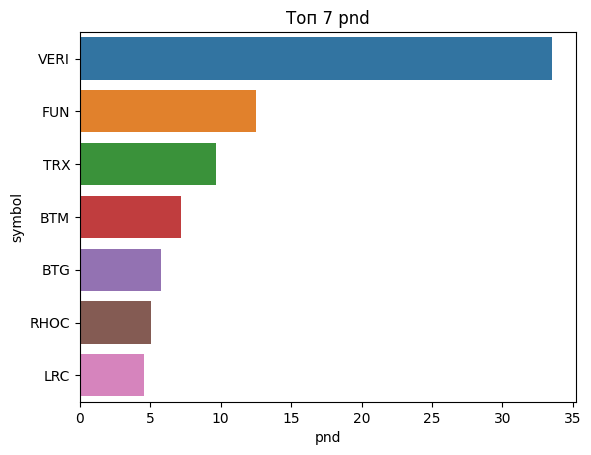

In [563]:
sns.barplot(data=df_.sort_values('pnd', ascending=False)[0:7], x="pnd", y="symbol")
plt.title("Топ 7 pnd")

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [564]:
def compute_roi(coins, investments, start_date, end_date):

    # Исходная цена портфеля
    sum_backpack = np.sum(list(investments.values()))
    
    df_coins = coins.reset_index()
    # Найдем кол-во купленных акций в начале
    count_act = []
    for key, val in investments.items():
        count_act.append(val / df_coins.loc[(df_coins['symbol'] == key) & (df_coins['date'] == start_date)]['price'].reset_index(drop=True).iloc[0])
    
    # Посчитаем цену в конце
    end_sum = []
    
    for key, val in investments.items():
        end_sum.append(df_coins.loc[(df_coins['symbol'] == key) & (df_coins['date'] == end_date)]['price'].reset_index(drop=True).iloc[0])
    
    return (np.sum(np.array(end_sum) * np.array(count_act)) - sum_backpack) / sum_backpack

In [565]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614

In [566]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто: 

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [567]:
def plot_bollinger_bands(coins, symbol, window, width):
    
    # Подготовим данные
    df_coins = coins[coins['symbol'] == symbol].reset_index()
    
    df_coins['mean'] = df_coins['price'].rolling(window).mean()
    df_coins['std^2'] = df_coins['price'].rolling(window).var()
    
    # Посчитаем границы
    df_coins["up_"] = df_coins.apply(lambda row: row['mean'] + width * np.sqrt(row['std^2']), axis=1)
    df_coins["down_"] = df_coins.apply(lambda row: row['mean'] - width * np.sqrt(row['std^2']), axis=1)
    
    # plt.figure(figsize=(15, 7))
    plt.grid(color='grey', linestyle='-', linewidth=0.5)
    
    plt.plot(df_coins['date'], df_coins['up_'], color='red')
    plt.plot(df_coins['date'], df_coins['price'], color='blue')
    plt.plot(df_coins['date'], df_coins['down_'], color='green')
    
    plt.title(f"График цены {symbol}")
    plt.xlabel("Дата")
    plt.ylabel(f"Цена монеты {symbol}")
    plt.legend(['верхн. гр. Боллинджера', 'цена', 'нижн. гр. Боллинджера'])
    
    plt.xticks([])
    
    plt.show()

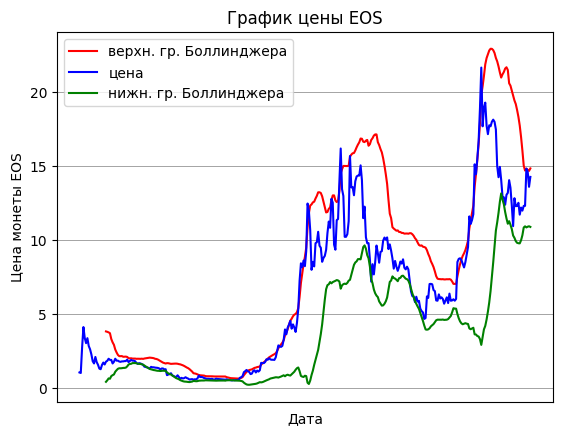

In [568]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

Можно сделать вывод, что метод технического анализа - границы Боллинджера выполняется

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка. 

При этом используйте данные начиная с 2017-07-01.

In [569]:
def plot_coins_capitalizations(coins, symbols, start_date):
    
    # Фильтрация данных
    df_coins = coins[coins['symbol'].isin(symbols)].reset_index()
    df_coins = df_coins[df_coins['date'] >= start_date]
    
    df_coins = df_coins.groupby(by='symbol').mean().reset_index()
    df_coins = df_coins[['symbol', 'market']]
    
    # Посчитаем доли капитализаций
    proc = df_coins['market'].sum()
    proc_df = df_coins.copy() # иначе изменяем один dataframe
    proc_df['market'] = proc_df['market'] / proc
    
    # Добавим полную долю в Датафрэйм
    proc_df.loc[len(proc_df)] = ['ALL FRAC', 1]
    proc_df = proc_df.sort_values(by='market', ascending=False)
    
    # Построим графики
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.barplot(ax=axes[0], data=df_coins.sort_values(by='market', ascending=False), x='market', y='symbol')
    axes[0].set_xlabel('capitalization')
    axes[0].set_title('Capitalization chart of some coins')
    
    sns.barplot(ax=axes[1], data=proc_df, x='market', y='symbol')
    axes[1].set_xlabel('part of the total capitalization')
    axes[1].set_title('Fraction of capitalization')
    
    plt.show()

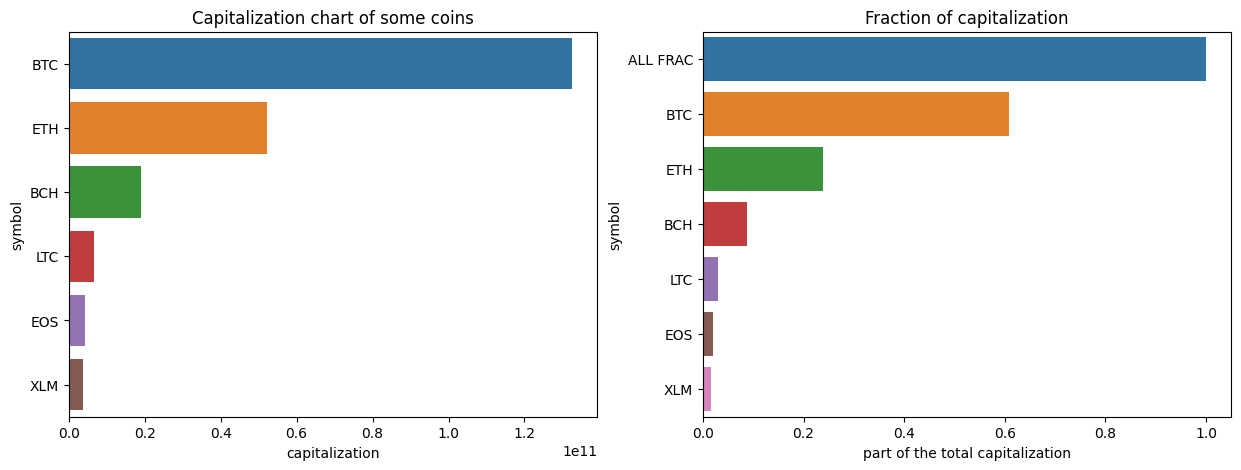

In [570]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Из графика можем заметить, что Биткоин имеет долю капитализации рынка больше половины. Это связано с тем, что Биткоин - одна из мервых известных криптоваляют, многие, кто начинают внедряться в сферу крипты - в основном только и знают Биткоин, значит охватывает большее число пользователей. Биткоин стал очень популярным, поэтому имеет высокую капитализацию

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [571]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here

IndentationError: expected an indented block (178508106.py, line 2)

In [1]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

NameError: name 'calc_coins_correlations' is not defined

Довольно интересно ещё взглянуть на 2017-12-27:

In [2]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

NameError: name 'calc_coins_correlations' is not defined

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности 

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.